In [33]:
import random
from collections import Counter


Create an array of possible decks:

In [34]:
ranks = ['Ace', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine', 'Ten', 'J', 'Q', 'K']
suits = ['Clubs', 'Spades', 'Hearts', 'Diamonds']
deck = []
for rank in ranks:
    for suit in suits:
        deck.append((rank, suit))

deck 

[('Ace', 'Clubs'),
 ('Ace', 'Spades'),
 ('Ace', 'Hearts'),
 ('Ace', 'Diamonds'),
 ('Two', 'Clubs'),
 ('Two', 'Spades'),
 ('Two', 'Hearts'),
 ('Two', 'Diamonds'),
 ('Three', 'Clubs'),
 ('Three', 'Spades'),
 ('Three', 'Hearts'),
 ('Three', 'Diamonds'),
 ('Four', 'Clubs'),
 ('Four', 'Spades'),
 ('Four', 'Hearts'),
 ('Four', 'Diamonds'),
 ('Five', 'Clubs'),
 ('Five', 'Spades'),
 ('Five', 'Hearts'),
 ('Five', 'Diamonds'),
 ('Six', 'Clubs'),
 ('Six', 'Spades'),
 ('Six', 'Hearts'),
 ('Six', 'Diamonds'),
 ('Seven', 'Clubs'),
 ('Seven', 'Spades'),
 ('Seven', 'Hearts'),
 ('Seven', 'Diamonds'),
 ('Eight', 'Clubs'),
 ('Eight', 'Spades'),
 ('Eight', 'Hearts'),
 ('Eight', 'Diamonds'),
 ('Nine', 'Clubs'),
 ('Nine', 'Spades'),
 ('Nine', 'Hearts'),
 ('Nine', 'Diamonds'),
 ('Ten', 'Clubs'),
 ('Ten', 'Spades'),
 ('Ten', 'Hearts'),
 ('Ten', 'Diamonds'),
 ('J', 'Clubs'),
 ('J', 'Spades'),
 ('J', 'Hearts'),
 ('J', 'Diamonds'),
 ('Q', 'Clubs'),
 ('Q', 'Spades'),
 ('Q', 'Hearts'),
 ('Q', 'Diamonds'),
 ('K', '

We need to now shuffle the deck

In [35]:
def shuffle_deck():
    deck_copy = deck.copy()
    shuffled_deck = [] 
    for i in range(len(deck)):
        random_card = random.choice(deck_copy)
        shuffled_deck.append(random_card)
        deck_copy.remove(random_card)
    return shuffled_deck

shuffled_deck = shuffle_deck()
shuffled_deck

[('Eight', 'Spades'),
 ('Seven', 'Diamonds'),
 ('Ten', 'Clubs'),
 ('Six', 'Diamonds'),
 ('Four', 'Diamonds'),
 ('Q', 'Hearts'),
 ('Nine', 'Hearts'),
 ('K', 'Clubs'),
 ('Three', 'Clubs'),
 ('K', 'Diamonds'),
 ('Eight', 'Diamonds'),
 ('J', 'Diamonds'),
 ('Ace', 'Diamonds'),
 ('Six', 'Clubs'),
 ('Two', 'Diamonds'),
 ('Ace', 'Spades'),
 ('Four', 'Clubs'),
 ('Six', 'Hearts'),
 ('Seven', 'Hearts'),
 ('Three', 'Spades'),
 ('K', 'Hearts'),
 ('Two', 'Hearts'),
 ('Eight', 'Hearts'),
 ('Two', 'Clubs'),
 ('Q', 'Diamonds'),
 ('Q', 'Clubs'),
 ('Ace', 'Clubs'),
 ('Nine', 'Spades'),
 ('Five', 'Spades'),
 ('Seven', 'Clubs'),
 ('Seven', 'Spades'),
 ('Three', 'Diamonds'),
 ('Four', 'Hearts'),
 ('Four', 'Spades'),
 ('Five', 'Diamonds'),
 ('Nine', 'Diamonds'),
 ('Three', 'Hearts'),
 ('Six', 'Spades'),
 ('Ten', 'Spades'),
 ('Eight', 'Clubs'),
 ('J', 'Clubs'),
 ('Five', 'Clubs'),
 ('Ten', 'Diamonds'),
 ('Q', 'Spades'),
 ('Nine', 'Clubs'),
 ('Ten', 'Hearts'),
 ('J', 'Hearts'),
 ('J', 'Spades'),
 ('Two', 'Spad

Creating a function which takes number of cards to be dealt with as parameter

In [36]:
def deal_N_cards(num_cards):
    shuffled_deck = shuffle_deck()
    drawn_cards = []
    for i in range(num_cards):
        drawn_card = random.choice(shuffled_deck)
        drawn_cards.append(drawn_card)
        shuffled_deck.remove(drawn_card)
    return drawn_cards

my_cards = deal_N_cards(5)
my_cards

[('Nine', 'Spades'),
 ('Q', 'Clubs'),
 ('Six', 'Clubs'),
 ('Nine', 'Hearts'),
 ('Six', 'Hearts')]

Check One Pair Now:
returns dictionary with value count of each rank on hand

In [37]:
def check_one_pair(hand):
    ranks = [i[0] for i in hand]
    value_counts = {}
    for rank in ranks:
        if rank not in value_counts.keys():
            value_counts[rank] = 1
        else:
            value_counts[rank] += 1
    return list(value_counts.values()).count(2) == 1 #will return true if any one key has value of 2
            
num_trials = 100
successes = [check_one_pair(deal_N_cards(5)) for i in range(num_trials)] #creating array to count number of successes
exp_probability = sum(successes)/len(successes)
theo_probability = 0.4225
print("Theoretical Probability of holding a Pair:", theo_probability*100, "%")
print("Expected Probability to hold a pair",exp_probability*100,"%")
print("% Deviation from theoretical value", "%0.2f" % ((sum((abs(theo_probability - exp_probability) for i in range(100)))/100)*100), "%")


Theoretical Probability of holding a Pair: 42.25 %
Expected Probability to hold a pair 49.0 %
% Deviation from theoretical value 6.75 %


Theoretical Value of probability of holding a pair
if dealt a 5-card hand is:


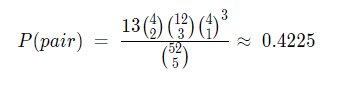

In [38]:
from IPython import display
display.Image("D:\Analysing_Stock_Prices\image.png.png")

Check for Two Pair now:

In [39]:
def check_two_pair(hand):
    ranks = [i[0] for i in hand]
    value_counts = {}
    for rank in ranks:
        if rank not in value_counts.keys():
            value_counts[rank] = 1
        else:
            value_counts[rank] += 1
    return list(value_counts.values()).count(2) == 2 #will return true if any one key has value of 2
            
num_trials = 1000
successes = [check_two_pair(deal_N_cards(5)) for i in range(num_trials)] #creating array to count number of successes
exp_probability = (sum(successes)/len(successes))*100
theo_probability = 0.04753
print("Theoretical Probability of holding Two Pairs:", theo_probability*100, "%")
print("Expected Probability to hold Two pairs:","%0.2f" %exp_probability,"%")
print("% Deviation from theoretical value:", "%0.2f" % ((sum((abs(theo_probability - exp_probability) for i in range(100)))/100)), "%")


Theoretical Probability of holding Two Pairs: 4.753 %
Expected Probability to hold Two pairs: 4.60 %
% Deviation from theoretical value: 4.55 %


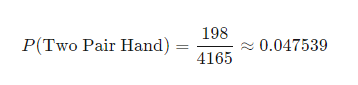

In [40]:
from IPython import display
display.Image("D:/Analysing_Stock_Prices/ke2.png")

Theoretical value of probability of holding Two Pair
if dealt a 5-card hand is

Check for Three of a Kind now:


In [41]:
num_trials = 1000

def three_of_a_kind(hand):
    three_kind = 0
    for i in range(num_trials):
        hand = deal_N_cards(5)
        if any(v==3 for k,v in Counter(card[0] for card in hand).items()):
               three_kind += 1
    return three_kind

theo_probability = 	0.0211
print("Theoretical Probability of holding a Three of a Kind:", theo_probability*100, "%")
print("Expected Probability to hold Three of a kind:","%0.2f" %(three_of_a_kind(deal_N_cards(5))/num_trials*100),"%")
print("% Deviation from theoretical value:", "%0.2f" % ((sum((abs(theo_probability - exp_probability) for i in range(100)))/100)), "%")

# successes = [three_of_a_kind(deal_N_cards(5)) for i in range(num_trials)]
# exp_probability = (sum(successes)/len(successes))
# print(exp_probability, "%")

Theoretical Probability of holding a Three of a Kind: 2.11 %
Expected Probability to hold Three of a kind: 3.00 %
% Deviation from theoretical value: 4.58 %


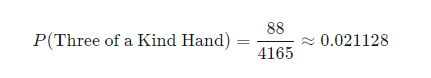

In [42]:
from IPython import display
display.Image("D:\Analysing_Stock_Prices\krnl.png")

Theoretical Value of probability of holding Three of a Kind

if dealt a 5-card hand is:

In [ ]:
import cython, pprint
from eval7 import equity
deck = eval7.Deck()
deck.shuffle()
hand = deck.deal(7)
pprint.pprint(hand)
eval7.evaluate(hand)
eval7.handtype(eval7.evaluate(hand))



Evaluate input Hand

In [153]:
xx = tuple((input()).split())
print(xx)
hand = [eval7.Card(s) for s in xx]
eval7.evaluate(hand)
eval7.handtype(eval7.evaluate(hand))

('3d', '5d', '6s', '7d')


'High Card'